In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
# load dataframe
df_TCRA_reads = pd.read_csv("../summary_data/additional/all_tools_TRA_reads.csv")
df_TCRA_reads.columns = ['Sample','tissue','tissue_type','repertoire_type','class','TRA_total_reads_tool','total_reads_RNA_seq','tool','TRA_derived_by_RNA_seq_tool']                      

df_TCRB_reads = pd.read_csv("../summary_data/additional/all_tools_TRB_reads.csv")
df_TCRB_reads = df_TCRB_reads[['Sample','tissue','tissue_type','repertoire_type','class','total_reads_tool','total_reads_RNA_seq','tool','TCR_derived_by_RNA_seq_tool']]
df_TCRB_reads.columns = ['Sample', 'tissue','tissue_type', 'repertoire_type','class', 'TRB_total_reads_tool','total_reads_RNA_seq','tool','TRB_derived_by_RNA_seq_tool']   

Number of TCRA and TCRB derived reads from RNA-Seq per one million RNA-Seq reads

In [3]:
# prepare the reads dataframe 
df_reads = pd.merge(df_TCRA_reads, df_TCRB_reads, how='outer', on=['Sample','tissue','tissue_type','repertoire_type','class','tool','total_reads_RNA_seq']).fillna(0)
df_reads = df_reads[['Sample','tissue','tissue_type','repertoire_type','class','tool','TRA_derived_by_RNA_seq_tool','TRB_derived_by_RNA_seq_tool']]
df_reads.rename(columns={'TRA_derived_by_RNA_seq_tool':'TRA','TRB_derived_by_RNA_seq_tool':'TRB'}, inplace=True)

In [4]:
# reshape the dataframe for plotting and calculation
df_reads_melt = pd.melt(df_reads, id_vars=['Sample','tissue','tissue_type','repertoire_type','class','tool'], var_name="chain", value_name="reads_derived_by_RNA_seq_tool")
df_reads_melt

Sample tissue  tissue_type repertoire_type                 class  \
0   addsample01   PBMC  T_cell_rich        high_SDI  T_cell_rich_high_SDI   
1   addsample02   PBMC  T_cell_rich        high_SDI  T_cell_rich_high_SDI   
2   addsample03   PBMC  T_cell_rich        high_SDI  T_cell_rich_high_SDI   
3   addsample04   PBMC  T_cell_rich        high_SDI  T_cell_rich_high_SDI   
4   addsample05   PBMC  T_cell_rich        high_SDI  T_cell_rich_high_SDI   
..          ...    ...          ...             ...                   ...   
75  addsample06   PBMC  T_cell_rich        high_SDI  T_cell_rich_high_SDI   
76  addsample07   PBMC  T_cell_rich        high_SDI  T_cell_rich_high_SDI   
77  addsample08   PBMC  T_cell_rich        high_SDI  T_cell_rich_high_SDI   
78  addsample09   PBMC  T_cell_rich        high_SDI  T_cell_rich_high_SDI   
79  addsample10   PBMC  T_cell_rich        high_SDI  T_cell_rich_high_SDI   

     tool chain  reads_derived_by_RNA_seq_tool  
0   MIXCR   TRA                       2.384127  
1   MIXCR   TRA                       5.366442  
2   MIXCR   TRA                       1.332090  
3   MIXCR   TRA                       0.802709  
4   MIXCR   TRA                       7.369433  
..    ...   ...                            ...  
75   CATT   TRB                     104.775785  
76   CATT   TRB                      76.571624  
77   CATT   TRB                      83.328562  
78   CATT   TRB                      81.783548  
79   CATT   TRB                      86.987975  

[80 rows x 8 columns]

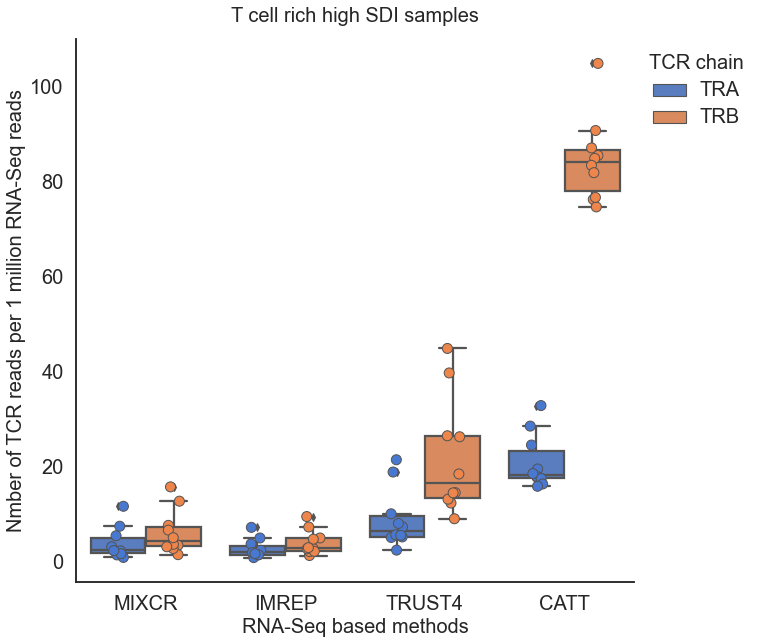

In [5]:
sns.set_style("white") 
sns.set_context("talk")  

reads_figure = df_reads_melt.loc[df_reads_melt['class'] == 'T_cell_rich_high_SDI']

ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x="tool",y="reads_derived_by_RNA_seq_tool",data=reads_figure,palette="muted",hue='chain')
sns.stripplot(x="tool",y="reads_derived_by_RNA_seq_tool",data=reads_figure,s=10,color=".3",palette="muted",hue='chain',dodge=True,linewidth=1)

ax.set_xlabel('RNA-Seq based methods',fontsize=20)
ax.set_ylabel('Nmber of TCR reads per 1 million RNA-Seq reads',fontsize=20)
plt.title('T cell rich high SDI samples',y=1.02,fontsize=20)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1, 1), frameon=False, title='TCR chain')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS19a.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS19a.png",bbox_inches="tight")

plt.show()

In [6]:
# Calculate the Pearson correlation for T_cell_rich high SDI repertoires
T_cell_rich_high_SDI = df_reads.loc[(df_reads['class'] == 'T_cell_rich_high_SDI')]

tools = ['MIXCR','IMREP','TRUST4','CATT']              
for tool in tools: 
    correlation = T_cell_rich_high_SDI.loc[(T_cell_rich_high_SDI['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9729472562328263, 2.2680591175576464e-06)
IMREP Pearson correlation coefficient:(0.972433265180189, 2.4438797559227907e-06)
TRUST4 Pearson correlation coefficient:(0.9562360570599906, 1.5221286720644577e-05)
CATT Pearson correlation coefficient:(0.5456110874877226, 0.10281363759437184)


In [7]:
repertoire_classes = ['T_cell_rich_high_SDI']
tools = ['MIXCR','IMREP','TRUST4','CATT']     

for repertoire_class in repertoire_classes: 
    print(repertoire_class)
    df_repertoire = df_reads_melt.loc[df_reads_melt['class'] == repertoire_class]
    mean_reads = df_repertoire.groupby("chain")["reads_derived_by_RNA_seq_tool"].agg(["mean", "std"])
    display(mean_reads)          
    for tool in tools:  
        print(tool)
        df_tool = df_repertoire.loc[df_repertoire['tool'] == tool]
        mean_reads = df_tool.groupby("chain")["reads_derived_by_RNA_seq_tool"].agg(["mean", "std"]) 
        display(mean_reads)

T_cell_rich_high_SDI


mean        std
chain                      
TRA     9.049485   8.573865
TRB    29.112323  34.008181

MIXCR


mean       std
chain                    
TRA    3.787948  3.384935
TRB    6.138006  4.653361

IMREP


mean       std
chain                    
TRA    2.675442  1.986293
TRB    3.960047  2.604716

TRUST4


mean        std
chain                      
TRA     8.880372   6.265520
TRB    21.848530  12.205758

CATT


mean       std
chain                     
TRA    20.854179  5.754999
TRB    84.502710  8.792608

Number of TCRA and TCRB clonotype

In [8]:
# load dataframe
df_TCRA_diversity = pd.read_csv("../summary_data/additional/all_tools_TRA_diversity.csv")
df_TCRA_diversity = df_TCRA_diversity[['Sample','shannon_index_tool','clonotype_count_tool','shannon_index_TCR','tool','repertoire_type','tissue_type','class']]
df_TCRA_diversity.columns = ['Sample', 'TRA_shannon_index','TRA_clonotype_count','TRA_shannon_index','tool','repertoire_type','tissue_type','class']

df_TCRB_diversity = pd.read_csv("../summary_data/additional/all_tools_TRB_diversity.csv")
df_TCRB_diversity = df_TCRB_diversity[['Sample','shannon_index_tool','clonotype_count_tool','shannon_index_TCR','tool','repertoire_type','tissue_type','class']]
df_TCRB_diversity.columns = ['Sample', 'TRB_shannon_index','TRB_clonotype_count','TRB_shannon_index','tool','repertoire_type','tissue_type','class']

# merge dataframe
df_diversity = pd.merge(df_TCRA_diversity, df_TCRB_diversity, how='outer', on=['Sample','tool','repertoire_type','tissue_type','class']).fillna(0)
df_diversity["repertoire_type"].replace({0: "polyclonal"}, inplace=True)
df_diversity = df_diversity.fillna(0)
df_diversity

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Sample  TRA_shannon_index  TRA_clonotype_count  TRA_shannon_index  \
0   addsample01           4.514225                  100           7.951096   
1   addsample01           4.418334                   86           7.951096   
2   addsample01           4.646404                  169           7.951096   
3   addsample01           5.040144                  379           7.951096   
4   addsample02           4.383436                  156           7.824713   
5   addsample02           4.424009                  129           7.824713   
6   addsample02           4.781445                  237           7.824713   
7   addsample02           5.337900                  446           7.824713   
8   addsample03           3.929794                   52           9.434150   
9   addsample03           3.943426                   53           9.434150   
10  addsample03           4.252762                   98           9.434150   
11  addsample03           5.265939                  371           9.434150   
12  addsample04           3.708931                   42           9.857141   
13  addsample04           3.718083                   42           9.857141   
14  addsample04           4.029609                   70           9.857141   
15  addsample04           4.979623                  355           9.857141   
16  addsample05           5.292415                  236           8.906202   
17  addsample05           5.065917                  172           8.906202   
18  addsample05           5.444300                  380           8.906202   
19  addsample05           6.148623                  663           8.906202   
20  addsample06           5.742242                  365           8.385267   
21  addsample06           5.494867                  266           8.385267   
22  addsample06           5.704655                  498           8.385267   
23  addsample06           5.940128                  694           8.385267   
24  addsample07           4.336104                   86           9.584192   
25  addsample07           4.220036                   75           9.584192   
26  addsample07           4.692248                  146           9.584192   
27  addsample07           4.728445                  327           9.584192   
28  addsample08           4.823984                  132           9.626994   
29  addsample08           4.599001                  104           9.626994   
30  addsample08           4.835552                  194           9.626994   
31  addsample08           6.824206                 1228           9.626994   
32  addsample09           4.087923                   63           9.985733   
33  addsample09           3.859468                   52           9.985733   
34  addsample09           4.468353                  122           9.985733   
35  addsample09           4.979584                  321           9.985733   
36  addsample10           4.464234                   94           9.477759   
37  addsample10           4.309252                   76           9.477759   
38  addsample10           4.616907                  145           9.477759   
39  addsample10           5.120650                  377           9.477759   

      tool repertoire_type  tissue_type                 class  \
0    MIXCR        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
1    IMREP        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
2   TRUST4        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
3     CATT        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
4    MIXCR        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
5    IMREP        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
6   TRUST4        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
7     CATT        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
8    MIXCR        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
9    IMREP        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
10  TRUST4        high_SDI  T_cell_rich  T_cell_rich_high_SDI   
11    CATT        high_SDI  T_

In [9]:
# prepare the clonotype dataframe
df_clonotype = df_diversity[['Sample','repertoire_type','tissue_type','class','tool','TRA_clonotype_count','TRB_clonotype_count']]
df_clonotype.rename(columns={'TRA_clonotype_count':'TRA','TRB_clonotype_count':'TRB'}, inplace=True)

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
# reshape the dataframe for plotting and calculation
df_clonotype_melt = pd.melt(df_clonotype, id_vars=['Sample','repertoire_type','tissue_type','class','tool'], var_name="chain", value_name="clonotype_counts")
df_clonotype_melt

Sample repertoire_type  tissue_type                 class    tool  \
0   addsample01        high_SDI  T_cell_rich  T_cell_rich_high_SDI   MIXCR   
1   addsample01        high_SDI  T_cell_rich  T_cell_rich_high_SDI   IMREP   
2   addsample01        high_SDI  T_cell_rich  T_cell_rich_high_SDI  TRUST4   
3   addsample01        high_SDI  T_cell_rich  T_cell_rich_high_SDI    CATT   
4   addsample02        high_SDI  T_cell_rich  T_cell_rich_high_SDI   MIXCR   
..          ...             ...          ...                   ...     ...   
75  addsample09        high_SDI  T_cell_rich  T_cell_rich_high_SDI    CATT   
76  addsample10        high_SDI  T_cell_rich  T_cell_rich_high_SDI   MIXCR   
77  addsample10        high_SDI  T_cell_rich  T_cell_rich_high_SDI   IMREP   
78  addsample10        high_SDI  T_cell_rich  T_cell_rich_high_SDI  TRUST4   
79  addsample10        high_SDI  T_cell_rich  T_cell_rich_high_SDI    CATT   

   chain  clonotype_counts  
0    TRA               100  
1    TRA                86  
2    TRA               169  
3    TRA               379  
4    TRA               156  
..   ...               ...  
75   TRB               924  
76   TRB               189  
77   TRB               116  
78   TRB               531  
79   TRB              1016  

[80 rows x 7 columns]

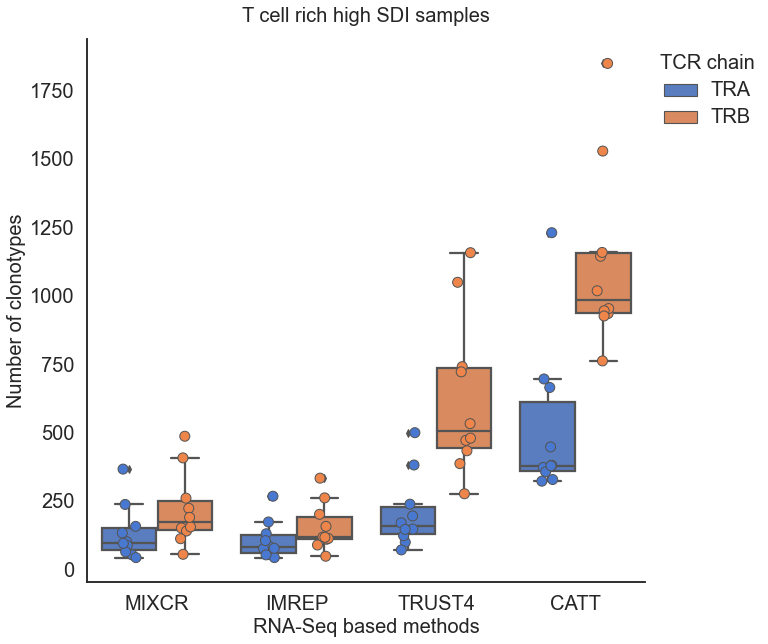

In [11]:
sns.set_style("white") 
sns.set_context("talk")  

clonotype_figure = df_clonotype_melt.loc[df_clonotype_melt['class'] == 'T_cell_rich_high_SDI']
ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x="tool",y="clonotype_counts",data=clonotype_figure,palette="muted",hue='chain')
sns.stripplot(x="tool",y="clonotype_counts",data=clonotype_figure,s=10,color=".3",palette="muted",hue='chain',dodge=True,linewidth=1)

ax.set_xlabel('RNA-Seq based methods',fontsize=20)
ax.set_ylabel('Number of clonotypes',fontsize=20)
plt.title('T cell rich high SDI samples',y=1.02,fontsize=20)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1, 1), frameon=False, title='TCR chain')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS19b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS19b.png",bbox_inches="tight")

plt.show()

In [12]:
# Calculate the Pearson correlation for T_cell_rich high SDI repertoires
T_cell_rich_high_SDI = df_clonotype.loc[(df_clonotype['class'] == 'T_cell_rich_high_SDI')]

tools = ['MIXCR','IMREP','TRUST4','CATT']              
for tool in tools: 
    correlation = T_cell_rich_high_SDI.loc[(T_cell_rich_high_SDI['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9593784943869197, 1.1341566325335765e-05)
IMREP Pearson correlation coefficient:(0.9466811767874143, 3.314654117566126e-05)
TRUST4 Pearson correlation coefficient:(0.9478897510614741, 3.0286620987455347e-05)
CATT Pearson correlation coefficient:(0.46257219787539544, 0.17825684982726642)


In [13]:
repertoire_classes = ['T_cell_rich_high_SDI']
tools = ['MIXCR','IMREP','TRUST4','CATT']     

for repertoire_class in repertoire_classes: 
    print(repertoire_class)
    df_repertoire = df_clonotype_melt.loc[df_clonotype_melt['class'] == repertoire_class]
    mean_clonotype = df_repertoire.groupby("chain")["clonotype_counts"].agg(["mean", "std"])
    display(mean_clonotype)          
    for tool in tools:  
        print(tool)
        df_tool = df_repertoire.loc[df_repertoire['tool'] == tool]
        mean_clonotype = df_tool.groupby("chain")["clonotype_counts"].agg(["mean", "std"]) 
        display(mean_clonotype)

T_cell_rich_high_SDI


mean         std
chain                     
TRA    240.025  231.425403
TRB    528.375  450.374072

MIXCR


mean         std
chain                   
TRA    132.6   99.734314
TRB    216.9  134.356450

IMREP


mean        std
chain                  
TRA    105.5  68.773784
TRB    153.7  86.567957

TRUST4


mean         std
chain                   
TRA    205.9  134.392005
TRB    623.2  289.211879

CATT


mean         std
chain                    
TRA     516.1  283.611413
TRB    1119.7  327.851948